In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
####### Lectura del CSV #######

df = pd.read_csv('bank.csv', delimiter=';')

In [4]:
####### Limpieza del CSV #######

# validar y eliminar nullos
if df.isnull().sum().any():
    df.dropna(inplace=True)  # Eliminar filas con valores faltantes

# Ver la estructura de los datos
pd.DataFrame(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
# validar tipo de datos de las columnas
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

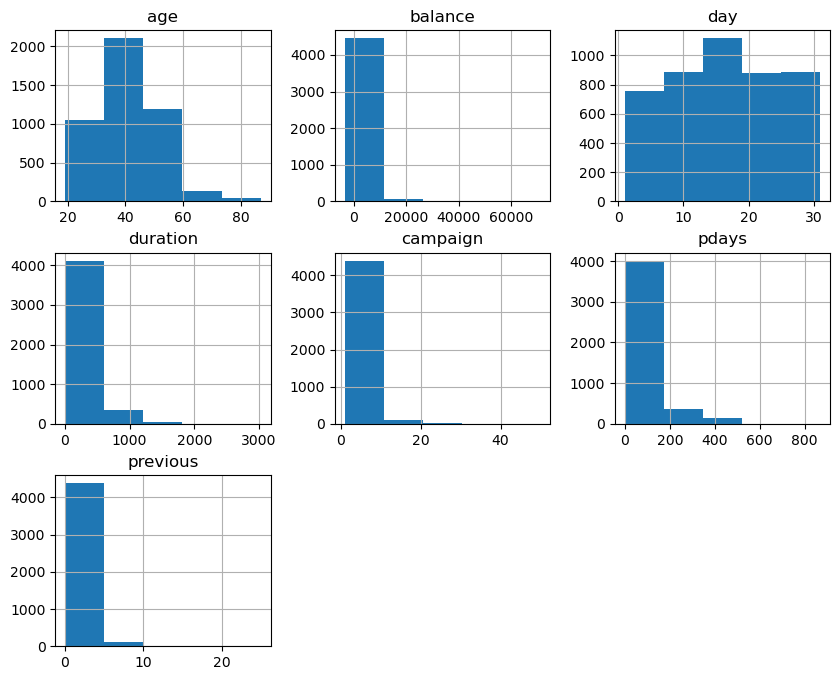

In [6]:
# Crear histogramas para todas las columnas numéricas
df.hist(bins=5, figsize=(10, 8))

# Mostrar los histogramas
plt.show()

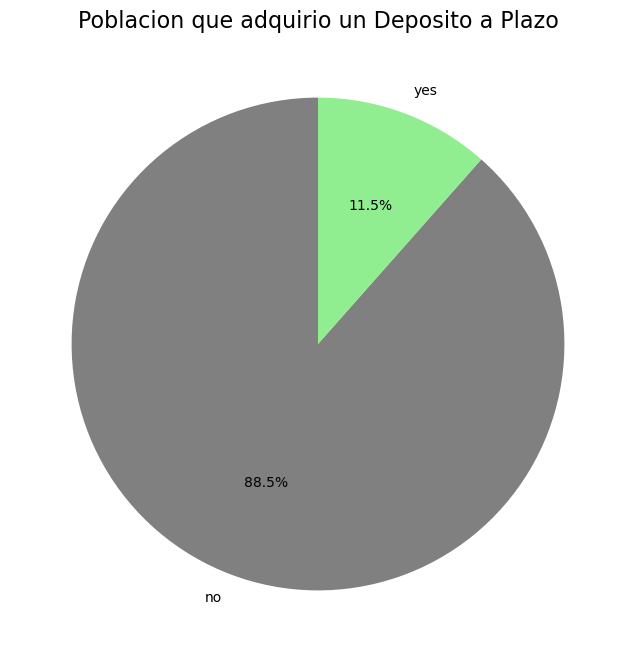

In [7]:
# Distribucion de las personas que tienen un deposito a plazo adquirido por una campaña de marketing
plt.figure(figsize=(8, 8))
gender_counts = df['y'].value_counts()

plt.pie(gender_counts, 
        labels=gender_counts.index, 
        autopct='%1.1f%%', 
        colors=['gray', 'lightgreen'], 
        startangle=90)

plt.title('Poblacion que adquirio un Deposito a Plazo', fontsize=16)

plt.show()

In [9]:
####### Creacion de variables dummie para reemplazar las variables categoricas #######

# Convertir las variables categoricas en variables dummies
df_encoded = pd.get_dummies(df, drop_first = True)

# Revisar las nuevas columnas
print(df_encoded.columns)

# Separar caracteristicas (X) y variables objetivo (y)
X = df_encoded.drop('y_yes', axis = 1)
y = df_encoded['y_yes']


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')


In [11]:
####### Generar conjunto de entrenamiento y pruebas #######
# la division del conjunto de datos se realiza posterior a la creacion de las dummies
# para asegurar que los datos son consistentes tanto en el modelo de testeo como entrenamiento

# Dividir los datos en un 80& para entranamiento y un 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Estandarizar las caracteristicas numericas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
####### Entrenar el modelo con validacion cruzada K-Fold #######

# Definir un modelo
model = LogisticRegression()

# Definir K-Fold corss-validation
kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv = kfold, scoring = 'accuracy')


print(f'Accuracy por cada fold: {cv_scores}')
print(f'Accuracy media: {cv_scores.mean()}')
print(f'Desviacion estandar de la accuracy: {cv_scores.std()}')


Accuracy por cada fold: [0.90607735 0.90318119 0.90318119 0.89903181 0.90456432]
Accuracy media: 0.903207170858073
Desviacion estandar de la accuracy: 0.002345835924379915


In [13]:
####### Entrenar el modelo y generar el reporte #######

# Entrenar el modelo completo
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)


print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Matriz de confusión: ')
print(confusion_matrix(y_test, y_pred))

print('Reporte de clasificacion')
print(classification_report(y_test, y_pred))


Accuracy: 0.901657458563536
Matriz de confusión: 
[[789  18]
 [ 71  27]]
Reporte de clasificacion
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       807
        True       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



In [28]:
####### Probar el modelo con un cliente ficticio #######


nuevo_cliente = pd.DataFrame({
    'age': [33],                # Edad más joven
    'job': ['management'],      # Profesión
    'marital': ['single'],      # Estado civil
    'education': ['tertiary'],  # Educación
    'balance': [15000],         # Balance
    'housing': ['si'],          # Préstamo hipotecario
    'loan': ['si'],             # Préstamo personal
    'duration': [600],          # Llamada más larga
    'campaign': [1],            # Primera campaña
    'pdays': [10],              # Días desde la última campaña
    'previous': [1],            # Campañas previas
    'poutcome': ['success']     # Resultado en la última campaña
})

# Realizar el One-Hot Encoding al nuevo cliente con las mismas columnas que los datos originales
nuevo_cliente_encoded = pd.get_dummies(nuevo_cliente, drop_first = True)

# Aseguramos que el nuevo clietne tenga exactamente las mismas columnas que los datos originales
# Si faltan columnas, se añaden con valor 0

for col in X.columns:
    if col not in nuevo_cliente_encoded.columns:
        nuevo_cliente_encoded[col] = 0


# Ordenar las columnas para que coincidan con el conjunto de dqatos original
nuevo_cliente_encoded = nuevo_cliente_encoded[X.columns]

# Estandarizar el nuevo cliente
nuevo_cliente_scaled = scaler.transform(nuevo_cliente_encoded)

# Hacer la prediccion
prediccion = model.predict(nuevo_cliente_scaled)

# Verificar la probabilidad de que el cliente adquiera o no un deposito a plazo
probabilidad = model.predict_proba(nuevo_cliente_scaled)


# Retornar un mensaje mas amigable que indique si el cliente tiene o no probabilidades de adquirir un deposito a plazo
# El valor de probabilidad puede ser ajustado 
if probabilidad[0][1] >= 0.40:
    print(f'El cliente probablemente va a adquirir un deposito a plazo')
    print(f'Probabilidad de adquirencia: {probabilidad[0][1]:.2f}')
else:
    print(f'El cliente probablemente no va a adquirir un deposito a plazo')
    print(f'Probabilidad de adquirencia: {probabilidad[0][1]:.2f}')




El cliente probablemente va a adquirir un deposito a plazo
Probabilidad de adquirencia: 0.43
